# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [65]:
id1 = "207045816

SyntaxError: EOL while scanning string literal (Temp/ipykernel_13404/1659107445.py, line 1)

In [3]:
df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [4]:
#df = pd.DataFrame([id1,id2])

In [5]:
df.to_clipboard(index=False,header=False)

Please fill your names here:

Shir Margolin

---

----

# Write your answers here

add as much lines of code and markdown as you need for each answer

# Q1 

הורדת ספריות

In [1]:
import pandas as pd
import numpy as np

קישור קובץ

In [87]:
url='https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/TripAdvisor_Bangkok.csv'
TripAdvisor_df=pd.read_csv(url)

# תיקון העמודה review_score   
אחרי הסתכלות בקובץ, רואים שהעמודה עם ערכים של עד 50,
ואני צריכה ערכים של עד 5,
אפשר לחלק את הערכי העמודה ב10

In [88]:
TripAdvisor_df['review_score']=TripAdvisor_df['review_score']/10
TripAdvisor_df

,hotel_name,average_score,user_name,Time,review_date,review_score,postal_code,address,code,year,month,quarter
0,@Home Phetkasem,4.0,Pat C,Pat C wrote a review Dec 2015,Dec-15,4.0,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2015,12,4
1,@Home Phetkasem,4.0,Shukki,Shukki wrote a review Sep 2013,Sep-13,4.0,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2013,9,3
2,@Home Residence,4.0,GlowSilver,GlowSilver wrote a review Apr 2019,Apr-19,5.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,4,2
3,@Home Residence,4.0,Ashraful Amin Robin,Ashraful Amin Robin wrote a review Feb 2019,Feb-19,4.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,2,1
4,@Home Residence,4.0,Raoul K,Raoul K wrote a review Jul 2018,Jul-18,5.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2018,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
127589,ฺBaan Suan Prannok Residence,4.5,BenitoLeo,BenitoLeo wrote a review Nov 2018,Nov-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,11,4
127590,ฺBaan Suan Prannok Residence,4.5,Paulze B,Paulze B wrote a review Nov 2018,Nov-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,11,4
127591,ฺBaan Suan Prannok Residence,4.5,Meira K,Meira K wrote a review Nov 2018,Nov-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,11,4
127592,ฺBaan Suan Prannok Residence,4.5,Stephienot55,Stephienot55 wrote a review Oct 2018,Oct-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,10,4


# הסטגרמה
ליצור היסטוגרמה לעמודה המתוקנתreview_score

- בשביל לייצר גרפים, צריך להתקין matplotlib

<AxesSubplot:>

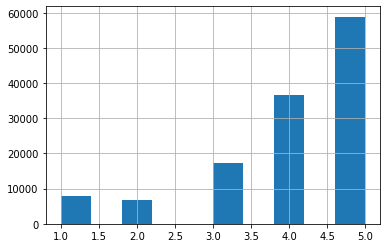

In [89]:
TripAdvisor_df['review_score'].hist()

 # Q2

# boxplot
עבור עמודת השנים (year)

<AxesSubplot:>

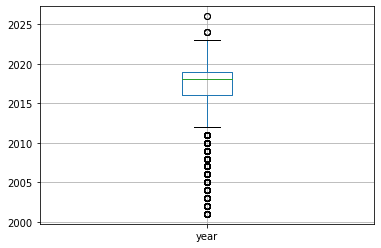

In [90]:
TripAdvisor_df.boxplot('year')

# הערכים חריגים:
יש שנים שחורגות מהוויסקר של הבוקספלוט-
*מעל 2023(לא הגיוני!!- טעות בהזנת נתונים?)
*מתחת או שווה ל2012,
הבעיה היא שלא הבנתי אם הכוונה היא נקודות חריגות= מעבר לערכי הוויסקר, או ערכים חריגים- משהו לא נורמלי או תקין, אז בחרתי בערכים חריגים

In [71]:
TripAdvisor_df_date_fixed= TripAdvisor_df[TripAdvisor_df[('year')]< 2021].copy()
TripAdvisor_df_date_fixed

,hotel_name,average_score,user_name,Time,review_date,review_score,postal_code,address,code,year,month,quarter
0,@Home Phetkasem,4.0,Pat C,Pat C wrote a review Dec 2015,Dec-15,4.0,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2015,12,4
1,@Home Phetkasem,4.0,Shukki,Shukki wrote a review Sep 2013,Sep-13,4.0,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2013,9,3
2,@Home Residence,4.0,GlowSilver,GlowSilver wrote a review Apr 2019,Apr-19,5.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,4,2
3,@Home Residence,4.0,Ashraful Amin Robin,Ashraful Amin Robin wrote a review Feb 2019,Feb-19,4.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,2,1
4,@Home Residence,4.0,Raoul K,Raoul K wrote a review Jul 2018,Jul-18,5.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2018,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
127589,ฺBaan Suan Prannok Residence,4.5,BenitoLeo,BenitoLeo wrote a review Nov 2018,Nov-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,11,4
127590,ฺBaan Suan Prannok Residence,4.5,Paulze B,Paulze B wrote a review Nov 2018,Nov-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,11,4
127591,ฺBaan Suan Prannok Residence,4.5,Meira K,Meira K wrote a review Nov 2018,Nov-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,11,4
127592,ฺBaan Suan Prannok Residence,4.5,Stephienot55,Stephienot55 wrote a review Oct 2018,Oct-18,5.0,10700,"225/1 Soi 43, Itsaraphap Road Kwang Ban CHang ...",2142,2018,10,4


# boxplot 
עבור עמודת השנים (year)- מתוקן

<AxesSubplot:>

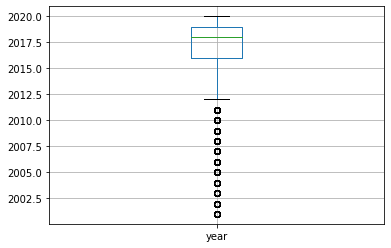

In [73]:
TripAdvisor_df_date_fixed.boxplot('year')

# Q3

עובדת עם העותק המתוקן(תאריכים חריגים)- TripAdvisor_df_date_fixed

# הסטוגרמה
הסטוגרמה משותפת לreview_score,average_score,
עם שקיפות בחפיפה

*חייב להשתמש בפלוט, אם מצרפים 2 עמודות להיסגרמה אחת

<AxesSubplot:ylabel='Frequency'>

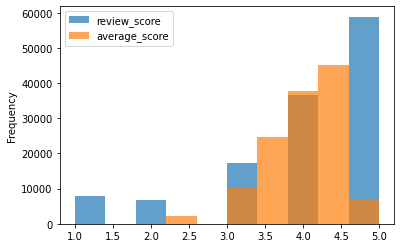

In [74]:
TripAdvisor_df_date_fixed[['review_score','average_score']].plot.hist(alpha=0.7 )

# Q4

עובדת עם העותק המתוקן(תאריכים חריגים)- TripAdvisor_df_date_fixed

# boxplot
עבור review_score,average_score

<AxesSubplot:>

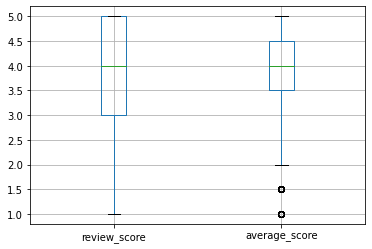

In [75]:
TripAdvisor_df_date_fixed[['review_score','average_score']].boxplot()

# הסבר על ההבדל בנתונים
ההבדל בין בהפלוטבוקס הוא טווח הנתונים, וזה הגיוני, בגלל שאת הביקורת הממוצעת לוקחים כערך אחד של כמה ביקורות על אותו מלון- משמע על כמה ערכים של ביקורות היה רק ערך אחד של ביקורת ממוצעת 

# Q5

עובדת עם העותק המתוקן(תאריכים חריגים)- TripAdvisor_df_date_fixed

# :מערך נתונים עם
    *month- איחוד תחומים
    *review_score- מיון בסדר יורד

*מבקשים מספר ביקורות, אפשר להשתמש בכל עמודה, אבל צריך לספור את מספר הערכים בה

In [76]:
TripAdvisor_df_date_fixed.groupby('month')[['review_score']].count().sort_values('review_score', ascending = False)

,review_score
month,
1,15311
12,12701
2,12642
3,11296
11,11093
10,10458
8,10030
7,9754
9,9486


# Q6

עובדת עם העותק המתוקן(תאריכים חריגים)- TripAdvisor_df_date_fixed

# :מערך נתונים עם
    *month- איחוד תחומים
    *review_score(ממוצע)- מיון בסדר יורד

In [45]:
TripAdvisor_df_date_fixed.groupby('month')[['review_score']].mean().sort_values('review_score', ascending = False)

,review_score
month,
10,4.139702
2,4.076966
9,4.066308
11,4.055531
12,4.049445
1,4.031154
3,4.020627
7,4.014046
8,4.002193


האם החודש בו ניתנו המספר הכי גבוה של ביקורות (שאלה 5) הוא גם החודש עם הציון הממוצע הגבוה ביותר?
-לא ,אלו לא אותם משתנים

# Q7

עובדת עם העותק המתוקן(תאריכים חריגים)- TripAdvisor_df_date_fixed

# :מערך נתונים עם
    *year- איחוד תחומים
    *hotel_name- איחוד תחומים
    *review_score(ממוצע)

In [83]:
TripAdvisor_df_by_country_year= TripAdvisor_df_date_fixed.groupby(['hotel_name','year'])[['review_score']].mean().copy()
TripAdvisor_df_by_country_year[TripAdvisor_df_by_country_year['review_score'] ==1].head()

review_score
hotel_name                     year              
13 Coins Airport Grand Resort  2016           1.0
                               2019           1.0
13 Coins Airport Hotel Minburi 2014           1.0
13 Coins Resort Bangna         2013           1.0
                               2015           1.0

נספור את השורות בטבלה

In [84]:
row_counter= TripAdvisor_df_by_country_year[TripAdvisor_df_by_country_year['review_score'] ==1].count()
row_counter

review_score    359
dtype: int64

# Q8

עובדת עם העותק (groupby)- TripAdvisor_df_by_country_year

# הסטגרמה
review_score(חודש)

<AxesSubplot:>

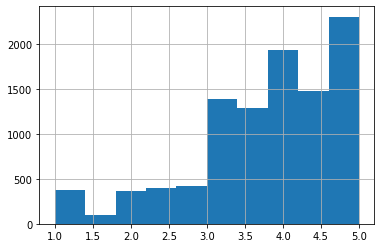

In [85]:
TripAdvisor_df_by_country_year['review_score'].hist()

# האם היא זהה/שונה מההסטוגרמה בשאלה שיצרתם לאותם נתונים בשאלה מספר 1? מדוע?
היא שונה, ההסטגרמה הראשונה בדקה נתונים לגבי ביקורות יחידות על המון מלונות שונים, ההיסטגרמה הזאת בודקת נתונים לגבי מלון מסויים, בשנה מסויימת, והממוצע של הביקורות

---
# GOOD LUCK !!!!
---

In [ ]:
# do not type below this line